<a href="https://colab.research.google.com/github/KangJunHyeokkkk/AIproject/blob/main/%EC%97%90%EC%BD%94%ED%94%84%EB%A1%9C%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/10
48/48 [==============================] - 4s 8ms/step - loss: 0.0036
Epoch 2/10
48/48 [==============================] - 0s 8ms/step - loss: 4.7623e-04
Epoch 3/10
48/48 [==============================] - 0s 8ms/step - loss: 4.5391e-04
Epoch 4/10
48/48 [==============================] - 0s 8ms/step - loss: 4.4116e-04
Epoch 5/10
48/48 [==============================] - 0s 8ms/step - loss: 4.0163e-04
Epoch 6/10
48/48 [==============================] - 0s 8ms/step - loss: 3.7733e-04
Epoch 7/10
48/48 [==============================] - 0s 8ms/step - loss: 3.6223e-04
Epoch 8/10
48/48 [==============================] - 0s 8ms/step - loss: 3.8308e-04
Epoch 9/10
48/48 [==============================] - 0s 8ms/step - loss: 3.4760e-04
Epoch 10/10
48/48 [==============================]

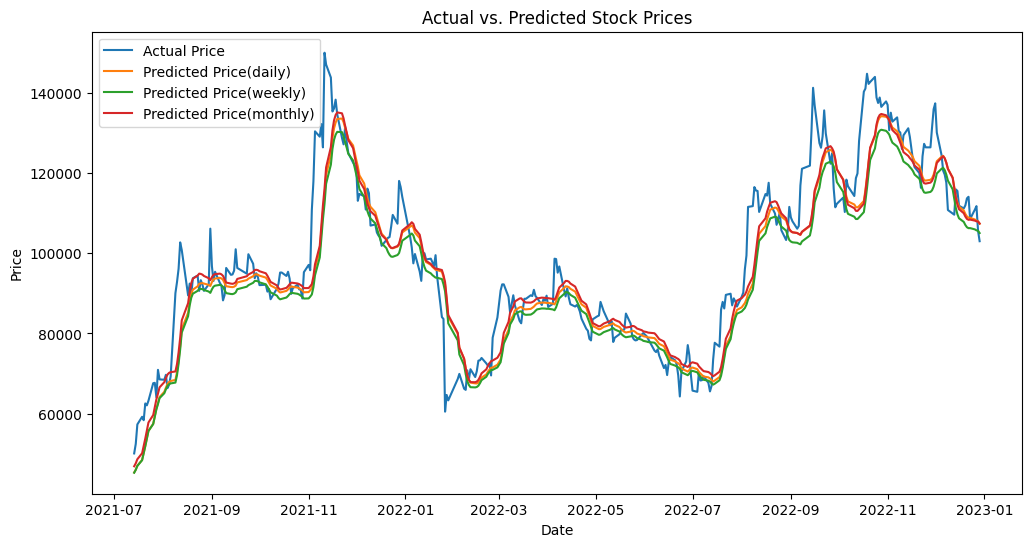

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras


# Define the ticker symbol for Ecopro Co.
ticker_symbol = "086520.KQ"

# Define the start and end dates
start_date = "2015-01-01"
end_date = "2023-01-01"

# Define the frequency daily
frequency_d = "1d"

# 1주 주기 = 1wk, 1달 주기 = 1mo
frequency_w = "1wk"
frequency_m = "1mo"

# Fetch the stock data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval=frequency_d)


data_w = yf.download(ticker_symbol, start=start_date, end=end_date, interval=frequency_w)
data_m = yf.download(ticker_symbol, start=start_date, end=end_date, interval=frequency_m)

# Select only the 'Close' prices from the retrieved data
data = data[['Close']]

data_w = data[['Close']]
data_m = data[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

scaler_w = MinMaxScaler(feature_range=(0, 1))
scaled_data_w = scaler_w.fit_transform(data_w)
scaler_m = MinMaxScaler(feature_range=(0, 1))
scaled_data_m = scaler_m.fit_transform(data_m)



# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

train_size_w = int(len(scaled_data_w) * 0.8)
train_data_w = scaled_data_w[:train_size_w]
test_data_w = scaled_data_w[train_size_w:]

train_size_m = int(len(scaled_data_m) * 0.8)
train_data_m = scaled_data_m[:train_size_m]
test_data_m = scaled_data_m[train_size_m:]


# Create input-output sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30  # Define the length of input sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train_w, y_train_w = create_sequences(train_data_w, sequence_length)
X_test_w, y_test_w = create_sequences(test_data_w, sequence_length)

X_train_m, y_train_m = create_sequences(train_data_m, sequence_length)
X_test_m, y_test_m = create_sequences(test_data_m, sequence_length)

# Build the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dense(units=1))

model_w = keras.Sequential()
model_w.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model_w.add(keras.layers.LSTM(units=50))
model_w.add(keras.layers.Dense(units=1))

model_m = keras.Sequential()
model_m.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model_m.add(keras.layers.LSTM(units=50))
model_m.add(keras.layers.Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

model_w.compile(optimizer='adam', loss='mean_squared_error')
model_w.fit(X_train_w, y_train_w, epochs=10, batch_size=32)

model_m.compile(optimizer='adam', loss='mean_squared_error')
model_m.fit(X_train_m, y_train_m, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

train_loss_w = model_w.evaluate(X_train_w, y_train_w, verbose=0)
test_loss_w = model_w.evaluate(X_test_w, y_test_w, verbose=0)
print("Train Loss(weekly):", train_loss_w)
print("Test Loss(weekly):", test_loss_w)

train_loss_m = model_m.evaluate(X_train_m, y_train_m, verbose=0)
test_loss_m = model_m.evaluate(X_test_m, y_test_m, verbose=0)
print("Train Loss(monthly):", train_loss_m)
print("Test Loss(monthly):", test_loss_m)

# Make predictions
predicted_data = model.predict(X_test)

predicted_data_w = model_w.predict(X_test_w)
predicted_data_m = model_m.predict(X_test_m)

# Inverse scaling on the predicted data
predicted_data = scaler.inverse_transform(predicted_data)

predicted_data_w = scaler_w.inverse_transform(predicted_data_w)
predicted_data_m = scaler_m.inverse_transform(predicted_data_m)

# Compare predictions with actual values
actual_data = scaler.inverse_transform(y_test)

actual_data_w = scaler_w.inverse_transform(y_test_w)
actual_data_m = scaler_m.inverse_transform(y_test_m)

# Make predictions
predicted_data = model.predict(X_test)

predicted_data_w = model_w.predict(X_test_w)
predicted_data_m = model_m.predict(X_test_m)

# Inverse scaling on the predicted data
predicted_data = scaler.inverse_transform(predicted_data)

predicted_data_w = scaler_w.inverse_transform(predicted_data_w)
predicted_data_m = scaler_m.inverse_transform(predicted_data_m)


# Inverse scaling on the actual data
actual_data = scaler.inverse_transform(y_test)

# Plot the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(actual_data):], actual_data, label='Actual Price')
plt.plot(data.index[-len(predicted_data):], predicted_data, label='Predicted Price(daily)')
plt.plot(data.index[-len(predicted_data_w):], predicted_data_w, label='Predicted Price(weekly)')
plt.plot(data.index[-len(predicted_data_m):], predicted_data_m, label='Predicted Price(monthly)')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

